In [5]:
#Submission for Rahul Arora (RESUBMITTED 7/18)
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

# Homework 2 - Polynomial Overfitting, Trees, and Random Forests

(Much of this is taken from Rebecca Willett's machine learning course.)



## Exercise 2.16 - Investigating Overfitting with Polynomial Regression

The goal of this exercise is to investigate overfitting in polynomial regression. First, we generate a synthetic dataset.

In [6]:
#given- domain is -10,10
def data_generator(n_samples ):
    x = np.random.uniform(-10, 10, n_samples)
    y = np.cos (0.5 + np.exp(-x)) + 1/(1 + np.exp(-x))
    noise = np.random.normal(0, 0.01,  n_samples)
    y += noise
    return x, y

complete_X , complete_Y = data_generator(5000)
train_X , train_Y = complete_X[:100], complete_Y[:100]
large_X , large_Y = complete_X[100:], complete_Y [100:]

loss_func = mean_squared_error

We will use `train_X` and `train_Y` as training samples for ERM, and `large_X` and `large_Y` as approximations to the true distribution of $X$ and $Y$ to estimate the true risk. Let's plot the small portion to see what our data looks like:

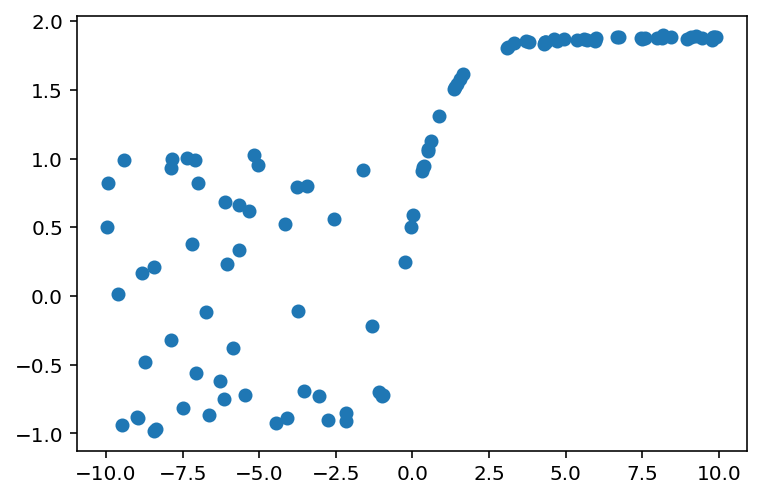

In [7]:
plt.scatter(train_X,train_Y)

### (a) Compute polynomials of best fit

The below function `best_poly` takes in a collection of $X$ values `X`, a collection of $Y$ values `Y`, and a degree `k`, and computes the polynomial $p_k$ of degree $k$ that best fits the data, as well as the mean square error of the best polynomial approximation of the data. Fill out this function. (Hint: you can use `np.polyfit`; you will need to set the optional parameter `full` to `True`.)



In [8]:
def best_poly(X, Y, k):
    '''
    Compute the best fit polynomial to (X,Y) of degree k
    and the mean squared error.
    Inputs:
        X: a numpy array of the dependent variables
        Y: a numpy array of the independent variables
        k: the degree of the fitted polynomial
    Outputs: 
        p: the coefficients of the best fit polynomial, 
            in decreasing order of power
        mse: the mean squared error
    '''
    
    # your code here..
    
    #using np.polyfit.
    fit = np.polyfit(X,Y,k,full=True)
 
    
    #calculating coeffcieints
    p = fit[0]
   
    #calculating mse
    mse = (fit[1]) / len(Y)

    #returning both
    return p, mse


### (b) Plot polynomials and data

Fill out the function `plot_poly_with_data`, which plots the polynomial you predicted in part (a) and the data points `train_X`, `train_Y` in the same plot. Use different colors so that you can distinguish between the two more easily. To plot a polynomial, you can generate an array of $x$ values for points on the polynomial using `np.linspace`, and the $y$ values for points on the polynomial using the coefficients you got in part (a). Display your plots for $k = 1, 2, 3, 10, 20, 30$, and title your plots appropriately. What do you observe?

- I noticed that, as k increases, the best\-fitting line becomes a lot more well\-fitted for the data and reduces the approximation error; however, this is done, at the cost of high estimation error.  I think that the ideal k is around 12 because it gives a good sense of the concentration of the data, whilst still leaving room for new points to join and differ at low total loss. 



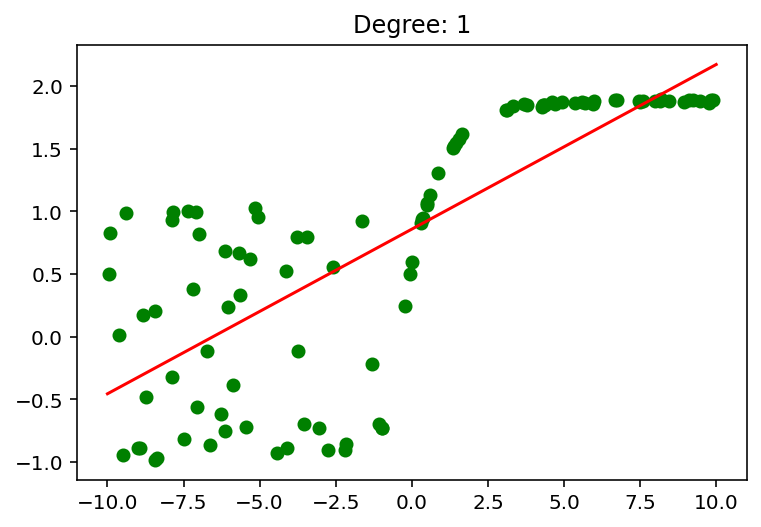

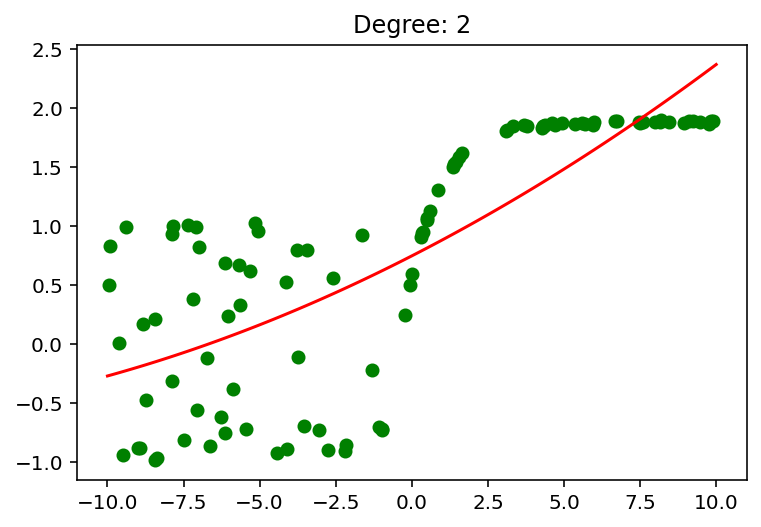

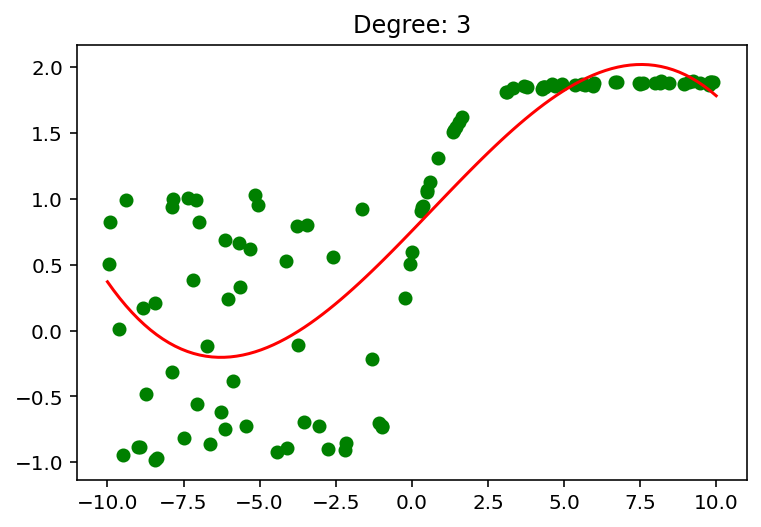

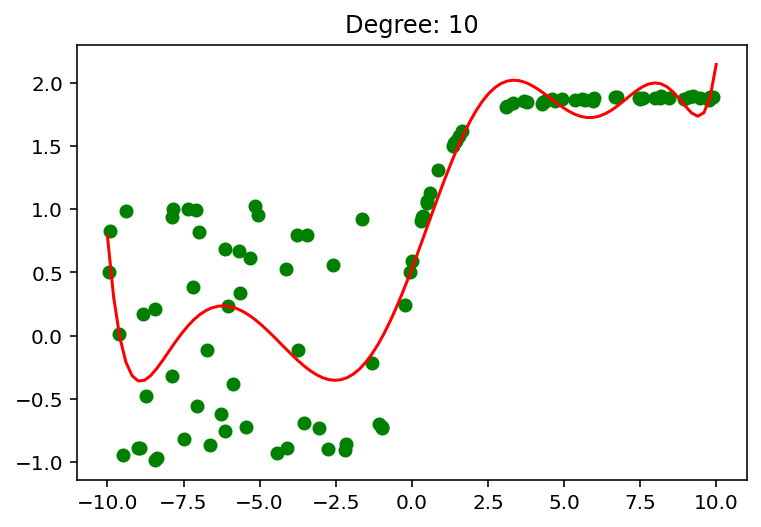

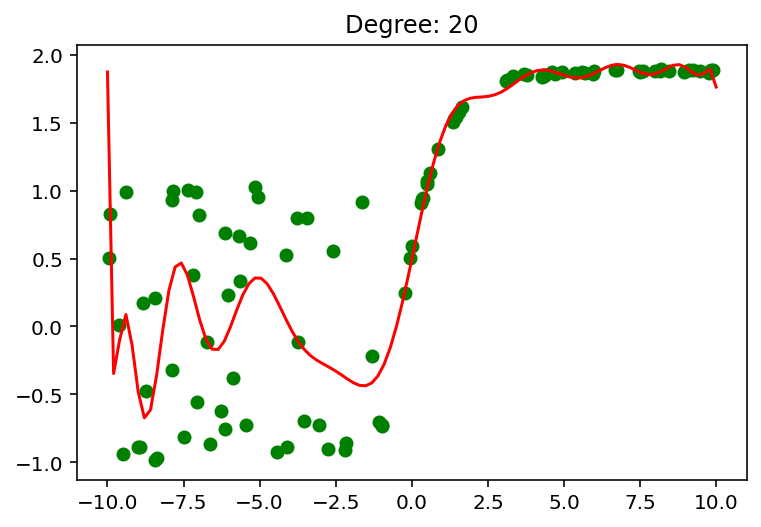

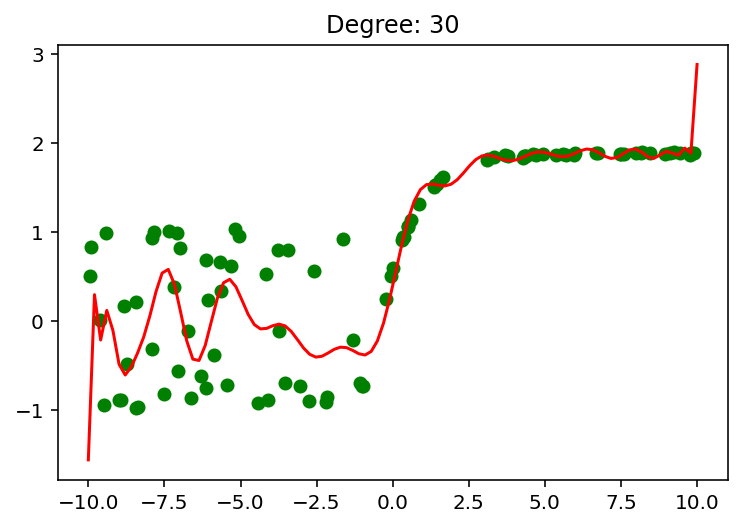

Off the bat, it seems like the 20th and 30th degrees are a no-go in terms of interpreting the data. They most likely overfit the data, and the way that the chart is set up further proves this as it is not clearly interpretable. The 10th degree also does not suffice as I can see a clear spike in the slope at the end. It does not follow an overall trend and is clearly overfitted to the points. As for the 1st degree, it does show an overall trend in the datapoints, however, this trend could be more specific. It is most likely underfitted to the points. Degree 3 has a sharp decline in its slope at the end of the x interval for some unknown reason. Therefore, it does not do a great job of showing a trend. Therefore, the second degree polynomial is most likely best fitted to these points as it shows a trend such as the first degree, but it's not as complex and overfitted as the other degrees. 


In [9]:
k = [1,2,3,10,20,30]
def plot_poly_with_data(X, Y, k, plot_title):
    '''
    Plot the best fit polynomial to X, Y of degree k,
    as well as the points X and Y
    Inputs:
        X: a numpy array of the dependent variables
        Y: a numpy array of the independent variables
        k: the degree of the fitted polynomial
        plot_title: title of your plot, supplied as a string
    Outputs:
        Nothing, just display the plot.
    '''
    #What does p, _ mean? What is the line?
    p, _ = best_poly(X,Y,k) # compute the coefficients for the best polynomial
    #extract coefficients from p
    coefficients = np.poly1d(p)
    #points on the poly line of best fit
    plt.plot(np.linspace(-10, 10, num = len(train_X)), coefficients(np.linspace(-10, 10, num=len(train_X))), color = "red")
    plt.title(plot_title)
    plt.scatter(X, y=Y, color="green")


for element in k:
    plot_poly_with_data(train_X, train_Y, element, "Degree: " + str(element))
    plt.show()
    
print("Off the bat, it seems like the 20th and 30th degrees are a no-go in terms of interpreting the data. They most likely overfit the data, and the way that the chart is set up further proves this as it is not clearly interpretable. The 10th degree also does not suffice as I can see a clear spike in the slope at the end. It does not follow an overall trend and is clearly overfitted to the points. As for the 1st degree, it does show an overall trend in the datapoints, however, this trend could be more specific. It is most likely underfitted to the points. Degree 3 has a sharp decline in its slope at the end of the x interval for some unknown reason. Therefore, it does not do a great job of showing a trend. Therefore, the second degree polynomial is most likely best fitted to these points as it shows a trend such as the first degree, but it's not as complex and overfitted as the other degrees. ")

### (c) Plot MSE versus degree

For $k = 0, 1, 2, \dots, 30$, compute the MSE of your predictor $p_k$ versus $k$ and plot MSE versus $k$. What do you observe?

- I observe that MSE decreases and approaches 0 \(almost asymptotically\), as k increases.



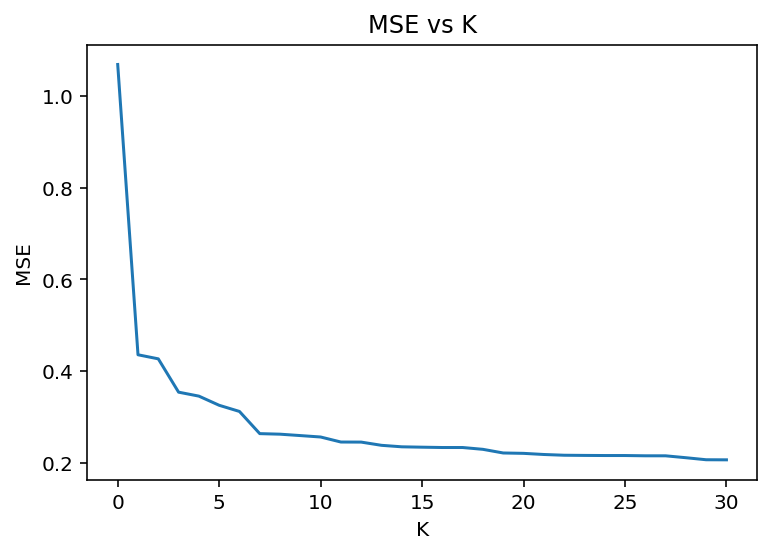

As seen in the graph, as the degree increases the mse decreases. This is because as you have a higher degree polynomial the polynomial fits the points more accurately. However, as the degree increases, so does the inability to predict future trends.


In [10]:
#making array of k's
X = []
#making array of mse's
mse = []

#filling arrays
for x in range(31):
    mse.append(best_poly(train_X, train_Y, x)[1])
    X.append(x)

#plotting/showing graph of correlation
plt.plot(X, mse)
plt.title("MSE vs K")
plt.ylabel("MSE")
plt.xlabel("K")
plt.show()

print("As seen in the graph, as the degree increases the mse decreases. This is because as you have a higher degree polynomial the polynomial fits the points more accurately. However, as the degree increases, so does the inability to predict future trends.")

### (d) Investigating testing error

Using `large_X` and `large_Y` as test data, compute the MSE of the polynomials *trained on `train_X` and `train_Y`* on the testing set. Plot your results for $k = 0, 1, 2, \dots, 30$. What does the shape look like?

- the shape looks to be very concentrated on the left
- left half, making the MSE's pretty signficant until the k's adjust.
- The shapes have increasingly more variation. Additionally, it takes a higher degree for the mse value to reach 0



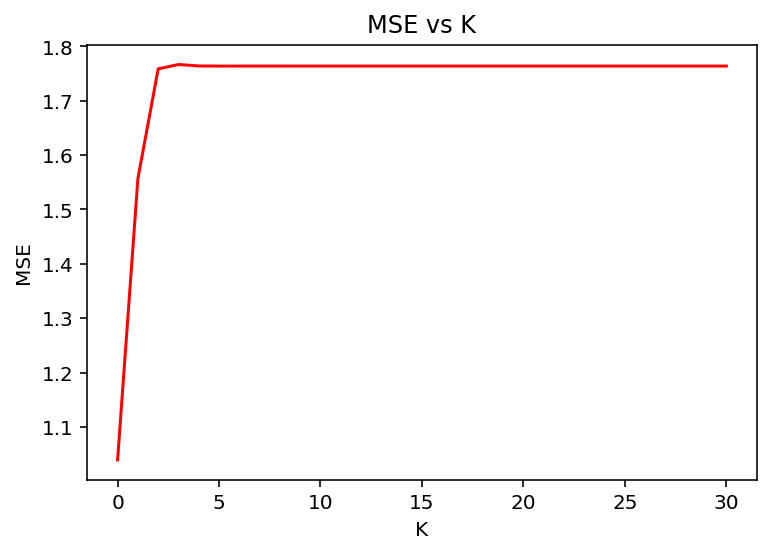

In [14]:
#looping through k's
ks = []
op = []
for x in range(31):
   
    coefficients = np.poly1d((best_poly(train_X, train_Y, x)[0][0]))
    
    
    
    error = 0
    for z in range (len(large_X)):
        error = error + (coefficients(large_X[z]) - large_Y[z])**2
        
    error = error / len(large_X)

   
    #appending to arrays
    op.append(error)
    ks.append(x)
    
 


#plot
plt.plot(ks, op, color = "red")
plt.title("MSE vs K")
plt.xlabel("K")
plt.ylabel("MSE")

plt.show()

    